In [8]:
import os
import time
import subprocess
import math
import fileinput
import sys
from astropy.io import fits 
import numpy as np
import matplotlib.pyplot as plt
import re
from dateutil.parser import parse
import datetime
from scipy.optimize import curve_fit
from scipy import ndimage

import ana_connie_lib as ana

plt.rcParams.update({
    "image.origin": "lower",
    "image.aspect": 1,
    #"text.usetex": True,
    "grid.alpha": .5,
    })

nCCDs=16

# define active and overscan masks
active_mask = np.s_[:, 10:1057] # 
overscan_mask = np.s_[:, -91:-1] 

In [9]:
file="/home/mauricio/datosFits/mcm_data/ansamp/fits/MCM1_Demuxed_Test_barrido_ANSAMP_exp_1s_ignorando_2muestras_ANSAMP1_18.fits"
OHDU_File = fits.open(file)

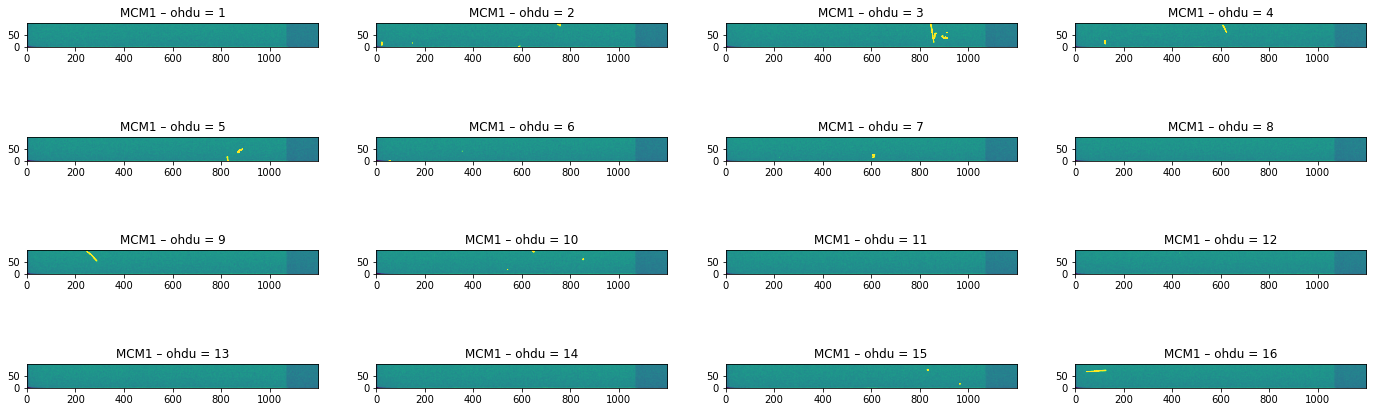

In [10]:
plt.figure(figsize=(24,8))
for i in range(nCCDs):
    plt.subplot(4,4,i+1)
    plt.imshow(OHDU_File[i+1].data[:,:]-np.median(OHDU_File[i+1].data), vmin=-100, vmax=100) # media sustracted
    plt.title('MCM1 – ohdu = {:d}'.format(i+1))

# Data procceced

median raw [1]= 24863.0
median [0]= -8.000000
median [1]= -8.000000
median [2]= -9.000000
median [3]= -5.000000
median [4]= -6.000000
median [5]= -6.000000
median [6]= -6.000000
median [7]= -6.000000
median [8]= -4.000000
median [9]= -6.000000
median [10]= -4.000000
median [11]= -5.000000
median [12]= -4.000000
median [13]= -3.000000
median [14]= -3.000000
median [15]= -4.000000
ansamp= 1


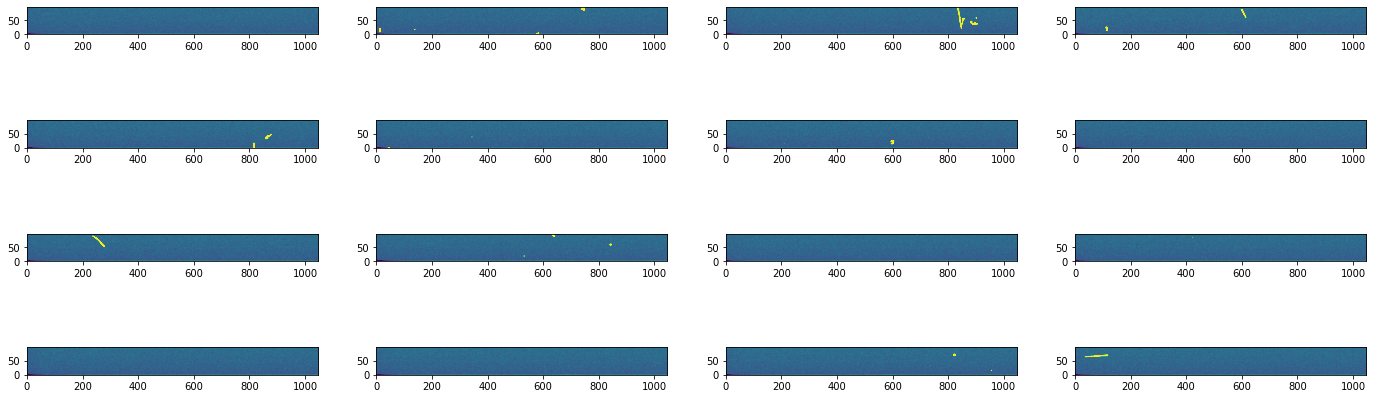

In [11]:
OHDU_Proc = (OHDU_File[1].data[active_mask]-np.median(OHDU_File[1].data[active_mask]))
print("median raw [1]= "+ str(np.median(OHDU_File[i+1].data)) )
plt.figure(figsize=(24,8))
for i in range(nCCDs):
    
    plt.subplot(4,4,i+1)
    dataFits=(OHDU_File[1+i].data[active_mask])-np.median(OHDU_File[i+1].data[active_mask])
    print("median [{:d}]= {:f}".format(i,np.median(dataFits[i+1].data)))
    plt.imshow(dataFits, vmin=-50, vmax=100) # media sustracted
    # plt.title('MCM1 – ohdu = {:d}'.format(i+1))

print("ansamp= "+OHDU_File[1].header['ANSAMP'])

In [12]:
def comp2regions(data_1, data_2):
    return 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


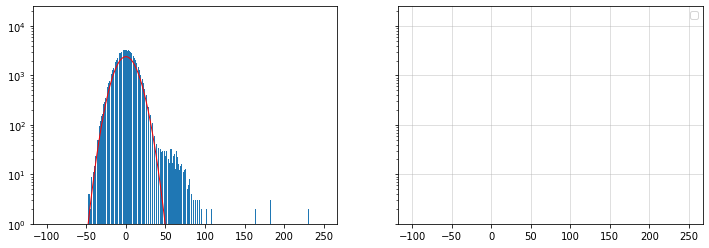

In [15]:
#dataFits=dataFits/int(OHDU_File[1].header['ANSAMP'])

fig, (hist_1, hist_2) = plt.subplots(ncols=2,sharex=True, sharey=True, figsize=(12, 4))# plt.subplots(2,1)

ansamp=int(OHDU_File[1].header['ANSAMP'])
limits=(-100,250)
histo, bins_edges = np.histogram(dataFits,bins='fd',range=limits)
class_marks = (bins_edges[:-1]+bins_edges[1:])/2
popt,pcov=curve_fit(ana.gaussian2,class_marks,histo)

left = hist_1.bar(class_marks,histo)
left = hist_1.plot(class_marks,ana.gaussian2(class_marks,*popt),linewidth=1,c='r', label=r'$\sigma$={:.2f}  gain={:.2f}'.format(abs(popt[1]),abs(popt[3])))        


plt.grid(True)
plt.ylim(1,25e3)  
plt.legend()
plt.yscale('log')
plt.grid(True)

In [14]:
dataFits.min()

-234.0